In [50]:
from numpy import *
from pandas import *
from matplotlib.pyplot import *
from tensorflow.keras import *
from tensorflow import *
from sklearn.datasets import *
from sklearn.model_selection import *
from sklearn.linear_model import *

In [51]:
data = read_csv(r"C:\Users\FAISAL-PC\Downloads\customer_churn.csv")
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
404,5495-GPSRW,Male,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.70,419.4,No
1761,5356-KZCKT,Male,0,No,No,58,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.45,1513.6,No
3615,6900-PXRMS,Male,1,Yes,Yes,26,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,105.75,2710.25,Yes
373,2805-EDJPQ,Female,0,Yes,Yes,56,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),99.75,5608.4,No
5875,2296-DKZFP,Female,0,Yes,No,65,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Two year,No,Bank transfer (automatic),71.00,4386.2,No


In [52]:
data.drop('customerID',axis='columns',inplace=True)
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5362,Male,0,Yes,Yes,65,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1715.1,No
5267,Male,1,Yes,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.85,183.15,No
4379,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),89.95,5974.3,No
6305,Female,1,No,No,26,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,95.00,2497.2,Yes
1084,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.60,1012.4,No


In [53]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [54]:
df = data[data.TotalCharges != ' ']
df.TotalCharges = to_numeric(df.TotalCharges,errors='coerce')
df.TotalCharges.values

C:\Users\FAISAL-PC\AppData\Local\Temp\ipykernel_21608\2979112415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = to_numeric(df.TotalCharges,errors='coerce')


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [55]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

C:\Users\FAISAL-PC\AppData\Local\Temp\ipykernel_21608\43847266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No internet service','No',inplace=True)
C:\Users\FAISAL-PC\AppData\Local\Temp\ipykernel_21608\43847266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No phone service','No',inplace=True)


In [56]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2743,Male,0,Yes,No,67,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,111.05,7321.05,No
585,Female,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.70,85.70,Yes
959,Female,0,Yes,Yes,32,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.10,2723.75,No
77,Female,0,Yes,Yes,8,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check,54.65,482.25,No
4143,Male,0,No,No,25,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.80,2043.45,Yes


In [57]:
for col in df:
    df[col].replace({'Yes':1,'No':0},inplace=True)
    df[col].replace({'Female':0,'Male':1},inplace=True)
    df[col].replace({False:0,True:1},inplace=True)

C:\Users\FAISAL-PC\AppData\Local\Temp\ipykernel_21608\586544788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\FAISAL-PC\AppData\Local\Temp\ipykernel_21608\586544788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\FAISAL-PC\

In [58]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
193,0,0,1,1,72,1,1,Fiber optic,1,1,1,0,1,1,Two year,0,Credit card (automatic),109.70,8129.30,0
2853,0,0,0,0,60,1,1,Fiber optic,0,0,1,0,0,0,One year,1,Bank transfer (automatic),79.20,4765.00,0
4906,0,0,1,1,72,1,1,Fiber optic,1,1,0,0,1,0,Two year,1,Bank transfer (automatic),95.90,6954.15,0
49,0,0,1,1,69,1,1,DSL,1,0,1,1,0,0,Two year,1,Credit card (automatic),64.15,4254.10,0
552,1,0,1,1,55,1,0,0,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),19.35,1153.25,0


In [59]:
df1 = get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [60]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5064,1,0,0,0,2,0,0,0,1,1,1,0,0,1,40.40,77.15,1,False,True,False,True,False,False,False,True,False,False
1536,1,0,1,1,69,1,0,1,1,1,1,1,0,1,75.75,5388.15,0,False,True,False,False,False,True,True,False,False,False
3247,0,0,0,0,72,1,1,0,1,1,1,1,1,1,111.60,8012.75,0,False,False,True,False,False,True,True,False,False,False
2901,0,0,1,1,72,1,1,1,1,0,0,1,0,1,95.10,6843.15,0,False,False,True,False,False,True,False,False,True,False
5472,1,0,1,1,24,1,1,1,0,0,1,1,1,0,81.00,1923.85,0,False,True,False,True,False,False,True,False,False,False


In [61]:
for col in df1:
    df1[col].replace({False:0,True:1},inplace=True)
df1.sample(5)

C:\Users\FAISAL-PC\AppData\Local\Temp\ipykernel_21608\2527265993.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({False:0,True:1},inplace=True)
C:\Users\FAISAL-PC\AppData\Local\Temp\ipykernel_21608\2527265993.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6133,1,0,0,0,2,0,0,0,0,0,0,0,0,1,24.90,49.70,0,0,1,0,1,0,0,0,1,0,0
5417,1,0,1,1,14,1,0,1,1,0,0,0,1,1,61.40,815.55,0,0,1,0,0,0,1,1,0,0,0
1799,0,0,0,0,10,1,1,1,0,0,0,1,1,1,98.70,973.25,1,0,0,1,1,0,0,0,0,1,0
2335,1,0,0,0,5,1,0,1,0,1,0,0,0,1,55.80,274.35,0,0,1,0,1,0,0,0,0,0,1
3086,1,0,0,0,17,1,1,0,0,1,1,0,1,1,95.65,1640.00,0,0,0,1,1,0,0,1,0,0,0


In [62]:
x = df1.drop('Churn',axis='columns')
y = df1['Churn']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=5)
x_train.shape , y_train.shape

((5625, 26), (5625,))

In [63]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,0,1,0,0,10,1,0,0,0,1,0,0,1,1,84.60,865.55,0,0,1,1,0,0,0,1,0,0
101,0,0,1,1,1,1,0,0,0,0,0,0,0,0,19.45,19.45,1,0,0,1,0,0,0,0,1,0
2621,1,0,1,0,71,1,0,0,1,1,1,1,1,1,79.10,5564.85,0,1,0,0,0,1,0,1,0,0
392,0,1,0,0,2,1,0,0,0,0,0,0,0,1,44.30,89.30,0,1,0,1,0,0,0,0,1,0
1327,1,0,1,0,59,1,1,0,0,1,0,1,1,1,99.50,5961.10,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,0,0,1,1,71,1,1,1,1,1,1,1,1,0,89.90,6342.70,0,1,0,0,0,1,1,0,0,0
1730,1,0,0,0,1,1,1,0,0,0,0,1,0,1,59.85,59.85,0,1,0,1,0,0,0,0,1,0
4086,0,0,1,0,72,1,1,1,1,1,1,1,0,0,79.20,5401.90,0,1,0,0,0,1,0,1,0,0
2259,0,0,0,0,8,1,0,0,0,0,0,0,0,0,20.85,161.65,1,0,0,0,0,1,0,0,0,1


In [64]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            int64
InternetService_DSL                          int64
InternetService_Fiber optic    

In [65]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100


c:\Users\FAISAL-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.4742 - loss: 132.7484
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.6603 - loss: 1.0193
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.7557 - loss: 0.7591
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.7624 - loss: 0.7886
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.7359 - loss: 1.0376
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.7557 - loss: 0.8324
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.7670 - loss: 0.7144
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.7498 - loss: 1.0976
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7470 - loss: 0.8947  
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.7650 - loss: 0.7776
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.7597 - loss: 0.7752
Epoch 12/100
176/176 ━━━━━━━━

In [66]:
model.evaluate(x_train,y_train)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7539 - loss: 0.4784


[0.4751894176006317, 0.7548444271087646]

In [67]:
model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.17132472],
       [0.3490611 ],
       [0.02940835],
       ...,
       [0.79434717],
       [0.7376665 ],
       [0.62090194]], dtype=float32)

In [68]:
from numpy import *
yp = model.predict(x_test)
yp[:10]


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step


array([[0.17132472],
       [0.3490611 ],
       [0.02940835],
       [0.866987  ],
       [0.67851853],
       [0.6698166 ],
       [0.31533074],
       [0.84787685],
       [0.84232897],
       [0.21113054]], dtype=float32)

In [69]:
y_pred = []
for val in yp:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

In [70]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [71]:
from sklearn.metrics import *
print(classification_report(y_test,y_pred))

In [72]:
def mae(y_pred,y_test):
    total = 0
    for yp,yt in zip(y_pred,y_test):
        total += abs(yt-yp)
    print("Total:",total)
    mae = total/len(y_test)
    print('Mean_abs_errors')
    return mae
mae(y_pred,y_test)

np.float64(0.2544420753375977)

In [73]:
def mse(y_pred,y_test):
    total_error = 0
    for yp,yt in zip(y_pred,y_test):
        total_error += (yt-yp)**2
    print('Total_error',total_error)
    mse = total_error/len(y_test)
    print('Mean_squre_error',mse)
    return mse
mse(y_pred,y_test)

0.2544420753375977

In [74]:
y_label = math.confusion_matrix(labels=y_test,predictions=y_pred)
y_label,y_label.shape

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[740, 259],
        [ 99, 309]], dtype=int32)>,
 TensorShape([2, 2]))

Text(50.722222222222214, 0.5, 'True')

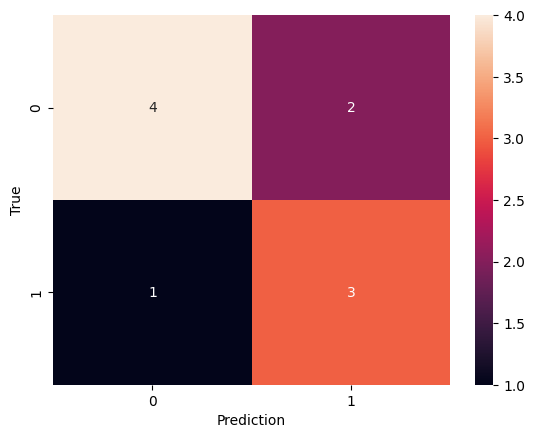

In [42]:
from seaborn import *
heatmap(y_label,annot=True,fmt='d')
xlabel('Prediction')
ylabel('True')
